# 1 Importing libraries and loading data

In [504]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

np.seterr(divide='ignore', invalid='ignore')

# useful function to load CIFAR-10 datasets
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [555]:
# loading datasets

# fashion MNIST
fashion_mnist_train = pd.read_csv("./datasets/fashion-mnist_train.csv") 
fashion_mnist_test = pd.read_csv("./datasets/fashion-mnist_test.csv")

# CIFAR-10 train
baseName = "./datasets/cifar-10-batches-py/data_batch_"
X_train = np.array([row for batch in [unpickle(baseName + str(i))[b'data'] for i in range(1, 6)] for row in batch])
y_train = np.array([label for batch in [unpickle(baseName + str(i))[b'labels'] for i in range(1, 6)] for label in batch])
cifar10_train = pd.DataFrame(X_train)
cifar10_train["class"] = y_train

# CIFAR-10 test
X_test = unpickle("./datasets/cifar-10-batches-py/test_batch")[b'data']
y_test = unpickle("./datasets/cifar-10-batches-py/test_batch")[b'labels']
cifar10_test = pd.DataFrame(X_test)
cifar10_test["class"] = y_test

# 2 Data analysis

# 2.1 Fashion MNIST analysis

In [532]:
fashion_mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [534]:
print("Fashion MNIST - number of rows:", len(fashion_mnist_train))

Fashion MNIST - number of rows: 60000


<div class="alert alert-success">
<b>Fashion MNIST - General overview</b><br>
From the previous results we can see that we have a training set with 60000 rows: a large amount of data in order to (potentially) have a good training. The dimensionality is high: 785 features. This is a problem for many models but in this case we are going to use Naïve Bayes that is really good at dealing with this fact (in the next section we'll discover why). 
</div>

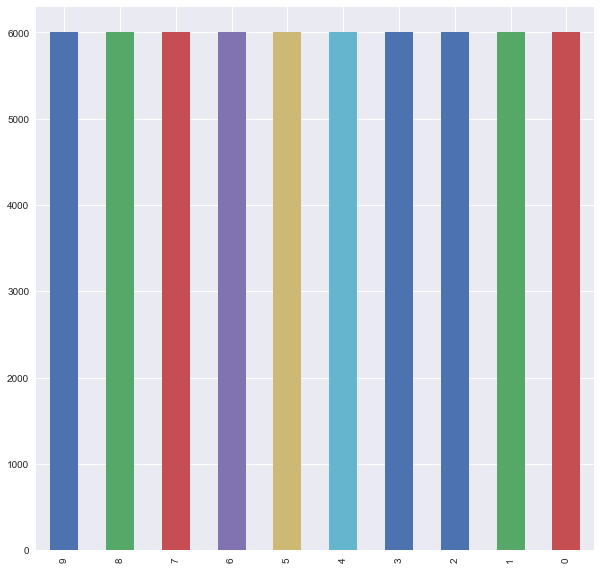

In [545]:
plt.figure(figsize=(10,10))
pd.value_counts(fashion_mnist_train['label']).plot.bar()

<div class="alert alert-success">
<b>Fashion MNIST - About the class distribution</b><br>
It is really important taking a look at class distribution because based on this analysis we should take a decision on our prior (see next section for better explanation on Naïve Bayes). In this case we can see that we have the same number of instaces for each class so we can conclude that there is no prior preference; in other words we can assume that the prior distribution is uniform: each class has P(t_new = Class) = 1 / K, where K is the number of classes.
</div>

# 2.2 CIFAR-10 analysis

In [541]:
cifar10_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,class
0,59,43,50,68,98,119,139,145,149,149,...,58,65,59,46,57,104,140,84,72,6
1,154,126,105,102,125,155,172,180,142,111,...,42,67,101,122,133,136,139,142,144,9
2,255,253,253,253,253,253,253,253,253,253,...,83,80,69,66,72,79,83,83,84,9
3,28,37,38,42,44,40,40,24,32,43,...,39,59,42,44,48,38,28,37,46,4
4,170,168,177,183,181,177,181,184,189,189,...,88,85,82,83,79,78,82,78,80,1


In [543]:
print("CIFAR-10 - number of rows:", len(cifar10_train))

CIFAR-10 - number of rows: 50000


<div class="alert alert-success">
<b>CIFAR-10 - General overview</b><br>
From the previous results we can see that we have a training set with 50000 rows. The dimensionality is really high, more than before: 3073 features. Again, with Naïve Bayes is perfect in this case (under the point of view of computational cost) but of course we don't know if all the attributes are independent. We'll see looking at performance metrics. 
</div>

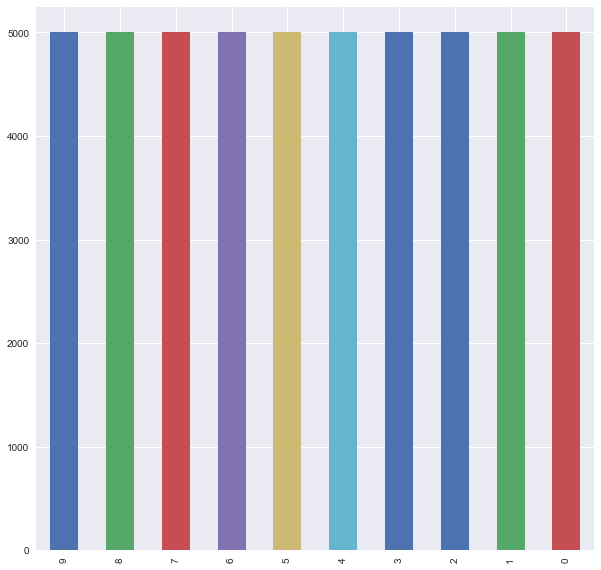

In [544]:
plt.figure(figsize=(10,10))
pd.value_counts(cifar10_train['class']).plot.bar()

<div class="alert alert-success">
<b>CIFAR-10 - About the class distribution</b><br>
Even in this case we have the same number of instaces for each class. Therefore the prior distribution is again uniform: each class has P(t_new = Class) = 1 / K, where K is the number of classes.
</div>

# 2.3 Pre-processing suggestions

<div class="alert alert-success">
We can do...
</div>

# 3 Classification

## 3.1 Naïve Bayes implementation

<div class="alert alert-success">
<b>Naïve Bayes: the goal</b><br>
In this classification model we would compute, given the input x, the probability that it belongs to class C_k. But in many cases this task is unfeasible, for this reason we use the Bayes theorem to solve the problem from another point of view.
</div>

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/52bd0ca5938da89d7f9bf388dc7edcbd546c118e">
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b0122d84d632cc399d2a49924797f37a7db53b0c">

<div class="alert alert-success">
<b>Naïve Bayes: how to proceed</b><br>
As showed in the last pictures, we should define a prior and compute the likelihood in order to get what we are looking for. From the previous analysis we have decided that the prior is a uniform distribution, where each class has probability 1/K. In the case of likelihood we suppose that attributes have normal distribution, so we can easily compute the likelihood for each attribute with this formula:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/685339e22f57b18d804f2e0a9c507421da59e2ab">
</div>

<div class="alert alert-success">
<b>Naïve Bayes: pros and cons</b><br>
This model is really easy to implement and computationally fast, especially when we are dealing with large amout of data with high dimensionality (like in our case). The other side of the coin is the model makes a strong assumption: <u>independence among features</u>; for this reason it is called "naïve". This assumption brings all the advantages which I talked about before but at the same time we should care if it is (quite) true in our data. If it is not, probably we'll have poor results.<br><br>

Making this assumption our life is easy: in order to compute p(x | C_k) we can simply compute the likelihood for each attribute and multiply them to obtain the likelihood for a specific class. At the end we simply choose the most likely:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5ed52009429e5f3028302427a067822fdfc58059">
</div>

In [488]:
class NaiveBayes:
    def __init__(self):
        self.noise = 0.005
    
    def fit(self, X, y):
        # separate rows by target class
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]
        # for all the rows belonging to the same class compute the mean and std dev for each attribute
        # obtaining two matrices nb of classes x nb of features
        # adding some noise in stds to avoid instability (division by zero problem)
        self.means = np.array([np.mean(g, axis=0) for g in separated])
        self.stds = np.array([np.std(g, axis=0) for g in separated]) + self.noise
    
    def predict(self, X):
        # for each row apply the function that compute the likelihood for each class and return the best one
        return np.apply_along_axis(self.predict_class_by_row, 1, X)
        
    def predict_class_by_row(self, row):
        # apply normal pdf in matrix form
        # for each row (number of classes) we got the log(likelihood) for an attribute in that class
        # using the log in order to avoid instability because of too small values
        # instead of np.prod use np.sum thanks to log operation
        # summing by row (independent attributes) we obtain the log(likelihood) for the i-th class
        # return the most likely
        P = np.sum(np.log(np.divide(np.exp(-np.divide((row-self.means)**2, 2 * self.stds**2)), 2*self.stds*np.sqrt(2*np.pi))), axis=1)
        return np.argmax(P)

## 3.2 Naive Bayes on CIFAR-10

In [558]:
model = NaiveBayes()
X_train = cifar10_train.drop(columns="class").as_matrix()
y_train = cifar10_train["class"].as_matrix()
model.fit(X_train, y_train)

In [559]:
import time
start = time.time()
X_test = cifar10_test.drop(columns="class").as_matrix()
y_pred = model.predict(X_test)
print("Prediction completed. Duration: %.1fs" % (time.time() - start))

Prediction completed. Duration: 9.7s


<div class="alert alert-success">
The performance of our custom model are really good. The implementation in the sklearn library takes about 30 seconds, not so far from this result.
</div>

In [562]:
print("The accuracy of the model is: %.2f%%" % ((cifar10_test["class"] == y_pred).sum() / len(cifar10_test) * 100))

The accuracy of the model is: 29.76%


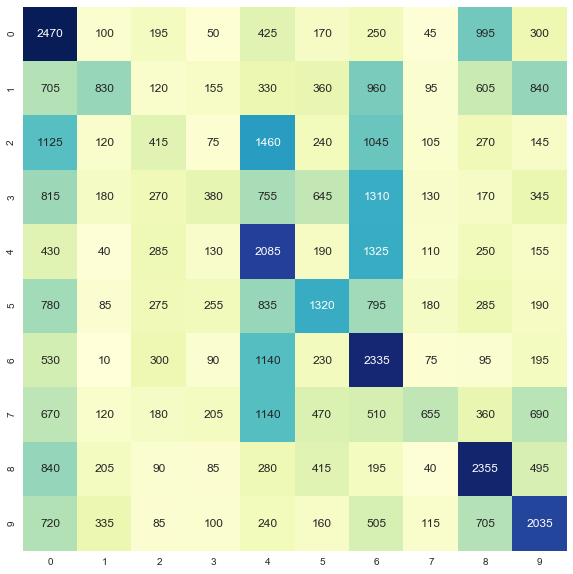

In [522]:
plt.figure(figsize=(10,10))
confusion_matrix_data = confusion_matrix(cifar10_test["class"], y_pred)
ax = sns.heatmap(confusion_matrix_data, annot=True, cbar=False, square=True, fmt='d', cmap="YlGnBu")

## 3.3 Naive Bayes on fashion MNIST

In [524]:
model2 = NaiveBayes()
X_train = fashion_mnist_train.drop(columns="label").as_matrix() 
y_train = fashion_mnist_train["label"].as_matrix()
model2.fit(X_train, y_train)

In [527]:
import time
start = time.time()
X_test = fashion_mnist_test.drop(columns="label").as_matrix()
y_pred = model2.predict(X_test)
print("Prediction completed. Duration: %.1fs" % (time.time() - start))

Prediction completed. Duration: 2.9s


In [526]:
print("The accuracy of the model is: %.2f%%" % ((fashion_mnist_test["label"] == predicts).sum() / len(fashion_mnist_test) * 100))

The accuracy of the model is: 59.38%


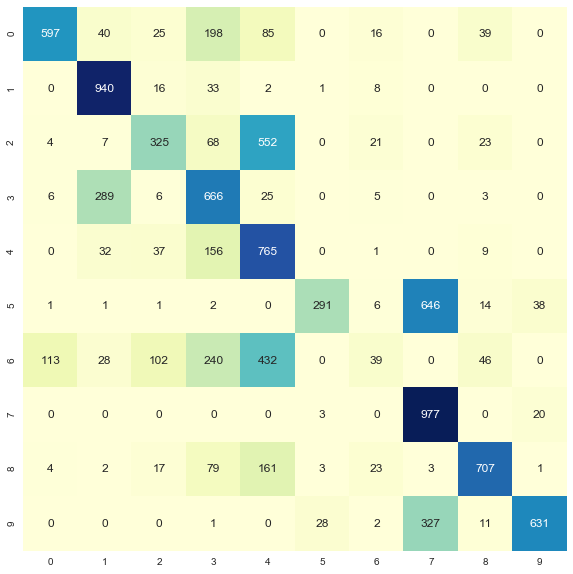

In [528]:
plt.figure(figsize=(10,10))
confusion_matrix_data = confusion_matrix(fashion_mnist_test["label"], y_pred)
ax = sns.heatmap(confusion_matrix_data, annot=True, cbar=False, square=True, fmt='d', cmap="YlGnBu")

## 3.4 Comparisons with random classifier

In [566]:
random_y_pred_cifar = np.random.randint(low=0, high=10, size=len(cifar10_test))
random_y_pred_mnist = np.random.randint(low=0, high=10, size=len(fashion_mnist_test))
print("The accuracy of random model for Fashion MNIST is: %.2f%%" % ((fashion_mnist_test["label"] == random_y_pred_mnist).sum() / len(fashion_mnist_test) * 100))
print("The accuracy of the model for CIFAR-10 is: %.2f%%" % ((cifar10_test["class"] == random_y_pred_mnist).sum() / len(cifar10_test) * 100))

The accuracy of random model for Fashion MNIST is: 10.55%
The accuracy of the model for CIFAR-10 is: 9.53%


# 4 Linear regression